In [1]:
from sklearn.feature_selection import mutual_info_classif           # Information Gain for classification task
from sklearn.feature_selection import chi2                          # chi-square feature selection method
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import RFE                           # Recurssive feature elimination algorithm
from sklearn.feature_selection import SequentialFeatureSelector     # Forward feature selectioin method
from sklearn.linear_model import LassoCV , RidgeCV                  # lasso and ridge cross validation algorithms for feature selection
from sklearn.feature_selection import SelectFromModel               # to select features according to prefit LassoCV and RidgeCV
import pandas as pd

### Dataset Loading ###

In [2]:
PATH = './data/ld1/Loan_Default.csv'
Target_Variable = 'Status'

frame = pd.read_csv(PATH)

In [3]:
frame.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [4]:
frame.isnull().sum()

ID                               0
year                             0
loan_limit                    3344
Gender                           0
approv_in_adv                  908
loan_type                        0
loan_purpose                   134
Credit_Worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
rate_of_interest             36439
Interest_rate_spread         36639
Upfront_charges              39642
term                            41
Neg_ammortization              121
interest_only                    0
lump_sum_payment                 0
property_value               15098
construction_type                0
occupancy_type                   0
Secured_by                       0
total_units                      0
income                        9150
credit_type                      0
Credit_Score                     0
co-applicant_credit_type         0
age                            200
submission_of_applic

In [5]:
for i in frame.columns[frame.isna().sum() > 0]:
    frame[i] = frame[i].interpolate('linear')

/tmp/ipykernel_20816/2695595236.py:2: FutureWarning: Series.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  frame[i] = frame[i].interpolate('linear')


In [6]:
frame.isnull().sum()

ID                              0
year                            0
loan_limit                   3344
Gender                          0
approv_in_adv                 908
loan_type                       0
loan_purpose                  134
Credit_Worthiness               0
open_credit                     0
business_or_commercial          0
loan_amount                     0
rate_of_interest                2
Interest_rate_spread            2
Upfront_charges                 2
term                            0
Neg_ammortization             121
interest_only                   0
lump_sum_payment                0
property_value                  0
construction_type               0
occupancy_type                  0
Secured_by                      0
total_units                     0
income                          0
credit_type                     0
Credit_Score                    0
co-applicant_credit_type        0
age                           200
submission_of_application     200
LTV           

In [7]:
from sklearn.preprocessing import LabelEncoder

cat_vars = ['loan_limit', 'Gender', 'approv_in_adv', 'loan_type','loan_purpose', 'Credit_Worthiness', 'open_credit','business_or_commercial', 'term', 'Neg_ammortization','interest_only', 'construction_type', 'occupancy_type', 'Secured_by',  'credit_type', 'co-applicant_credit_type','submission_of_application', 'Region', 'Security_Type', 'dtir1','lump_sum_payment','total_units','age']

for i in cat_vars:
    le = LabelEncoder()
    frame[i] = le.fit_transform(frame[i])
    # col = le.transform(frame[i])
    # frame.drop([i],axis=0)
    # frame[i] = col

In [8]:
[frame[i].iloc[0:10] for i in frame.columns]

[0    24890
 1    24891
 2    24892
 3    24893
 4    24894
 5    24895
 6    24896
 7    24897
 8    24898
 9    24899
 Name: ID, dtype: int64,
 0    2019
 1    2019
 2    2019
 3    2019
 4    2019
 5    2019
 6    2019
 7    2019
 8    2019
 9    2019
 Name: year, dtype: int64,
 0    0
 1    0
 2    0
 3    0
 4    0
 5    0
 6    0
 7    2
 8    0
 9    0
 Name: loan_limit, dtype: int64,
 0    3
 1    2
 2    2
 3    2
 4    1
 5    1
 6    1
 7    0
 8    1
 9    3
 Name: Gender, dtype: int64,
 0    0
 1    0
 2    1
 3    0
 4    1
 5    1
 6    1
 7    0
 8    0
 9    0
 Name: approv_in_adv, dtype: int64,
 0    0
 1    1
 2    0
 3    0
 4    0
 5    0
 6    0
 7    0
 8    0
 9    2
 Name: loan_type, dtype: int64,
 0    0
 1    0
 2    0
 3    3
 4    0
 5    0
 6    2
 7    3
 8    2
 9    2
 Name: loan_purpose, dtype: int64,
 0    0
 1    0
 2    0
 3    0
 4    0
 5    0
 6    0
 7    0
 8    0
 9    0
 Name: Credit_Worthiness, dtype: int64,
 0    0
 1    0
 2    0
 3    0
 

In [9]:
frame = frame.dropna()
frame

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
2,24892,2019,0,2,1,0,0,0,0,1,...,3,834,0,1,1,80.019685,3,1,0,356
3,24893,2019,0,2,0,0,3,0,0,1,...,3,587,0,2,0,69.376900,0,1,0,308
4,24894,2019,0,1,1,0,0,0,0,1,...,1,602,1,0,0,91.886544,0,1,0,273
5,24895,2019,0,1,1,0,0,0,0,1,...,3,864,1,1,0,70.089286,0,1,0,285
6,24896,2019,0,1,1,0,2,0,0,1,...,3,860,1,3,1,79.109589,0,1,0,334
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,173555,2019,0,3,0,0,2,0,0,1,...,0,659,1,3,1,71.792763,3,1,0,380
148666,173556,2019,0,2,0,0,0,0,0,1,...,0,569,0,0,0,74.428934,3,1,0,37
148667,173557,2019,0,2,0,0,3,0,0,1,...,0,702,1,2,0,61.332418,0,1,0,390
148668,173558,2019,0,0,0,0,3,0,0,1,...,3,737,1,3,1,70.683453,0,1,0,160


In [10]:
from sklearn.model_selection import train_test_split

X = frame.drop([Target_Variable],axis=1)
Y = frame[Target_Variable]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [11]:
len(X.columns)

33

### Chi-Square Feature Selection ###

In [12]:
X_c = X.drop(['Interest_rate_spread'],axis=1)
df = frame.drop(['Interest_rate_spread'],axis=1)

In [13]:
chi2_stats, p_values = chi2(X_c, Y)

In [14]:
from sklearn.feature_selection import SelectKBest
k = 3
chi2_selector = SelectKBest(chi2, k=k) 
X_new = chi2_selector.fit_transform(X_c, Y) 
  
selected_features = df.columns[:-1][chi2_selector.get_support()] 
print("\nSelected Features:") 
print(selected_features)


Selected Features:
Index(['loan_amount', 'property_value', 'income'], dtype='object')


<BarContainer object of 32 artists>

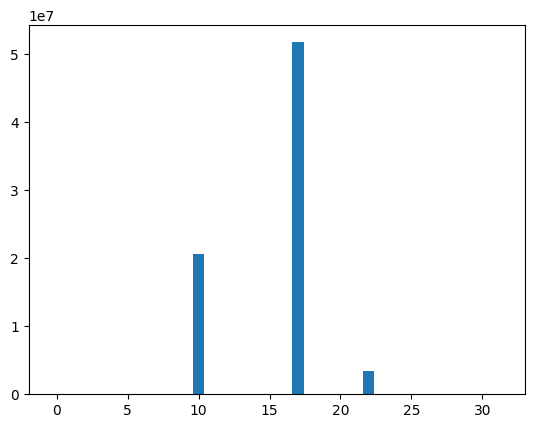

In [15]:
import matplotlib.pyplot as plt

plt.bar(range(32),chi2_stats)

<BarContainer object of 32 artists>

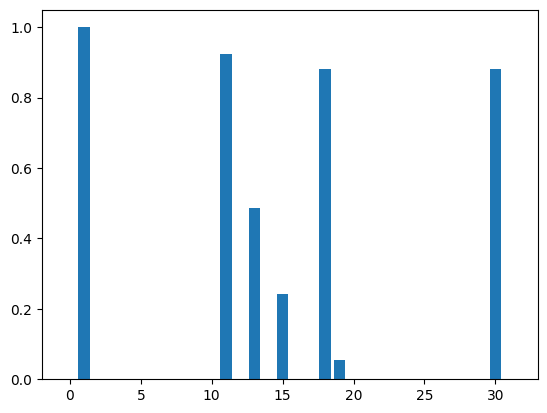

In [16]:
import matplotlib.pyplot as plt

plt.bar(range(32),p_values)

In [17]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train[selected_features],y_train)
score = clf.score(X_test[selected_features],y_test)
score

0.7544485436497421

In [18]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(X_train[selected_features],y_train)
score = clf.score(X_test[selected_features],y_test)
score

0.7658832881514849

### Mutual Info ###

In [19]:
fs = mutual_info_classif(X,Y)

In [20]:
len(fs)

33

<BarContainer object of 33 artists>

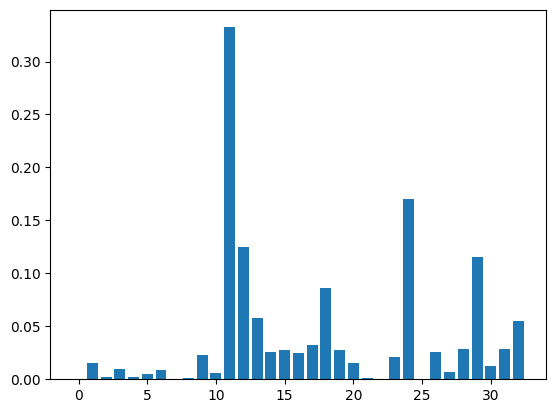

In [21]:
import matplotlib.pyplot as plt

plt.bar(range(33),fs)

In [29]:
selected_features = X.columns[fs > 0.05] 
print("\nSelected Features:") 
print(selected_features)


Selected Features:
Index(['rate_of_interest', 'Interest_rate_spread', 'Upfront_charges',
       'property_value', 'credit_type', 'LTV', 'dtir1'],
      dtype='object')


In [30]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(max_iter=1000000)
clf.fit(X_train[selected_features],y_train)
score = clf.score(X_test[selected_features],y_test)
score

0.754428160860969

In [31]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(X_train[selected_features],y_train)
score = clf.score(X_test[selected_features],y_test)
score

0.9219746845763437